<a href="https://colab.research.google.com/github/Noman-494/my_new/blob/main/Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Overview of the Dataset:**
This dataset contains data on accidents across the US, providing details such as location, weather conditions, and various road features that could contribute to the severity of an accident. Below is a breakdown of the key features in the dataset:

Location Information:

Start_Lat, Start_Lng, End_Lat, End_Lng: Latitude and longitude of the accident locations.
City, County, State, Zipcode: Geographical identifiers.
Street, Side, Number: Street-level details.
Time Information:

Start_Time, End_Time: The time the accident started and ended.
Timezone, Weather_Timestamp: Timezone of the accident and weather data timestamp.
Weather and Environmental Information:

Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Speed(mph), Precipitation(in), Weather_Condition: Weather-related features that could impact accident severity.
Road Features:

Distance(mi): Distance of the road affected by the accident.
Features like Bump, Crossing, Give_Way, Junction, Railway, Traffic_Calming, Traffic_Signal provide additional context on road conditions.
Target Variable: Severity

This column represents the severity of the accident, and the goal is to predict its value based on other features.

relevant nesscary libray are imported

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/k593hUxwSQS7ad5J9Pwe_US_Accidents_May19.csv')

<ipython-input-4-3ab53a64ec67>:1: DtypeWarning: Columns (32,33,34,35,36,37,38,39,40,41,42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/k593hUxwSQS7ad5J9Pwe_US_Accidents_May19.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132924 entries, 0 to 132923
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     132924 non-null  object 
 1   Source                 132924 non-null  object 
 2   TMC                    132924 non-null  float64
 3   Severity               132924 non-null  int64  
 4   Start_Time             132924 non-null  object 
 5   End_Time               132923 non-null  object 
 6   Start_Lat              132923 non-null  float64
 7   Start_Lng              132923 non-null  float64
 8   End_Lat                0 non-null       float64
 9   End_Lng                0 non-null       float64
 10  Distance(mi)           132923 non-null  float64
 11  Description            132923 non-null  object 
 12  Number                 32541 non-null   float64
 13  Street                 132923 non-null  object 
 14  Side                   132923 non-nu

**Feauture Selection:**
In the dataset, there are numerous features that describe various aspects of each accident, such as location, weather conditions, road features, and environmental factors. However, not all features are equally important for predicting the severity of an accident. The selected features in the code focus on capturing key elements that are likely to influence accident severity.

Here is a breakdown of the selected features:

Severity: The target variable, representing the severity of the accident. This is the feature we aim to predict.
Start_Lat, Start_Lng: Latitude and longitude of the accident's location. These geographical coordinates help understand the context of the accident, such as urban vs. rural areas.
Distance(mi): The distance affected by the accident. Larger distances may indicate more severe accidents.
Temperature(F), Visibility(mi), Wind_Speed(mph), Precipitation(in): Key weather-related features that can impact driving conditions and accident severity.
Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight: These features represent the lighting conditions during the accident, which can play a critical role in visibility and road safety.
Weather_Condition: Provides information on the general weather during the accident (e.g., clear, rainy, foggy), which directly impacts road safety.
By selecting these relevant features, the focus is placed on factors that are most likely to influence the prediction of accident severity, simplifying the model while retaining critical information. The remaining features, although useful in certain contexts, may introduce unnecessary noise into the model, so they were omitted for this analysis.

In [6]:

# Select relevant features
features = ['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Weather_Condition']
df_selected = df[features]

df_selected.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132924 entries, 0 to 132923
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               132924 non-null  int64  
 1   Start_Lat              132923 non-null  float64
 2   Start_Lng              132923 non-null  float64
 3   Distance(mi)           132923 non-null  float64
 4   Temperature(F)         128495 non-null  float64
 5   Visibility(mi)         128378 non-null  float64
 6   Wind_Speed(mph)        101045 non-null  float64
 7   Precipitation(in)      7056 non-null    float64
 8   Sunrise_Sunset         132913 non-null  object 
 9   Civil_Twilight         132913 non-null  object 
 10  Nautical_Twilight      132913 non-null  object 
 11  Astronomical_Twilight  132913 non-null  object 
 12  Weather_Condition      128639 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 13.2+ MB


In [8]:

df_selected = df_selected.sample(frac=0.5, random_state=42)


In [9]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66462 entries, 38614 to 17657
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Severity               66462 non-null  int64  
 1   Start_Lat              66462 non-null  float64
 2   Start_Lng              66462 non-null  float64
 3   Distance(mi)           66462 non-null  float64
 4   Temperature(F)         64208 non-null  float64
 5   Visibility(mi)         64179 non-null  float64
 6   Wind_Speed(mph)        50486 non-null  float64
 7   Precipitation(in)      3492 non-null   float64
 8   Sunrise_Sunset         66459 non-null  object 
 9   Civil_Twilight         66459 non-null  object 
 10  Nautical_Twilight      66459 non-null  object 
 11  Astronomical_Twilight  66459 non-null  object 
 12  Weather_Condition      64278 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 7.1+ MB


In [7]:
import seaborn as sns
import matplotlib.pyplot

The pairplot provides a comprehensive overview of the relationships between the selected features and the target variable (Severity).
Severity vs. Distance: There is a slight increase in severity with greater distances, but the relationship is weak.
Severity vs. Temperature: No clear pattern is observed between temperature and severity.
Severity vs. Visibility: Lower visibility tends to be associated with more severe accidents, suggesting visibility is an important factor.
Severity vs. Wind Speed: Similar to temperature, wind speed doesn't show a strong correlation with severity.
Severity vs. Precipitation: Slightly higher severity may be seen with more precipitation, though the trend is not very strong.
Severity vs. Latitude/Longitude: No clear relationship between location and severity.
Severity vs. Time of Day: The impact of time-related factors (Sunrise, Twilight) on severity needs further investigation.

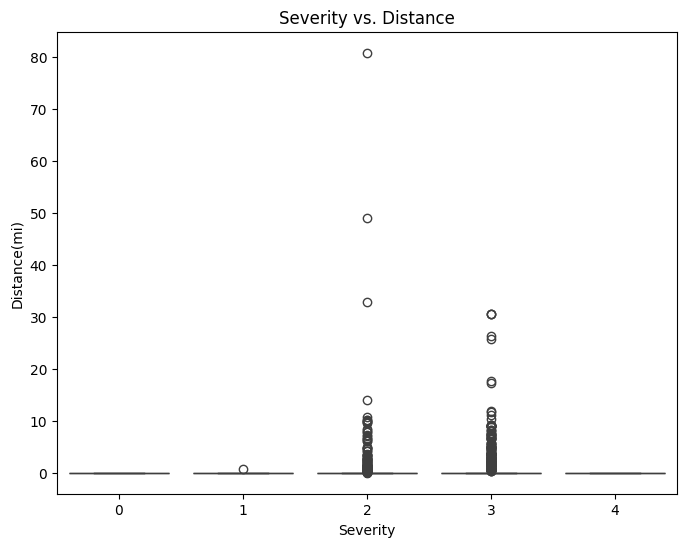

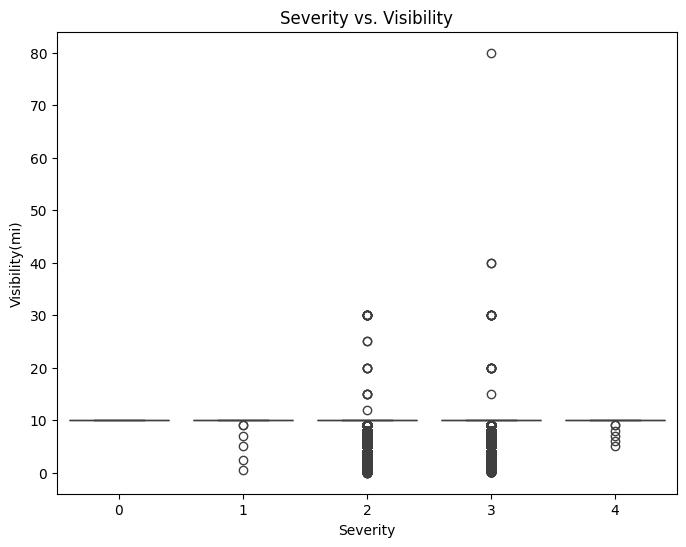

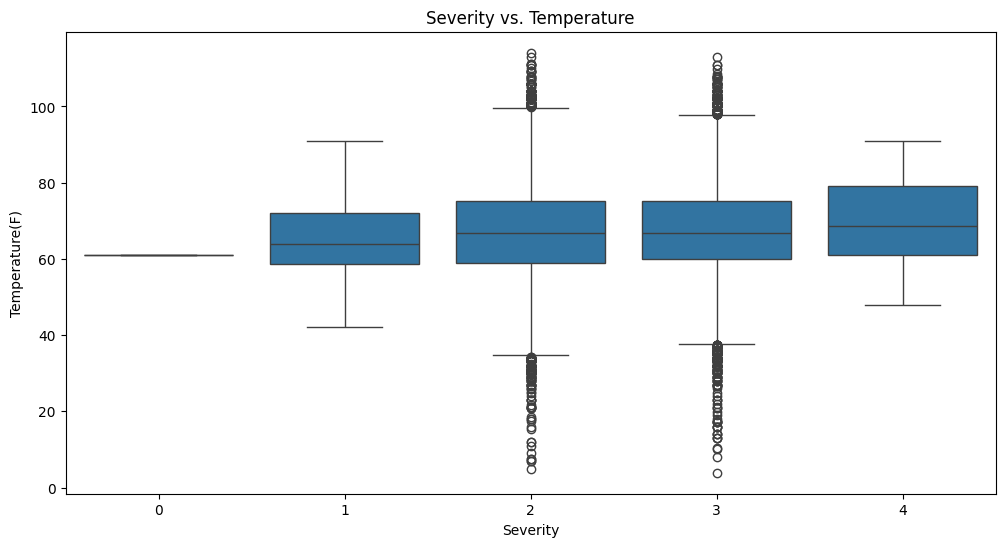

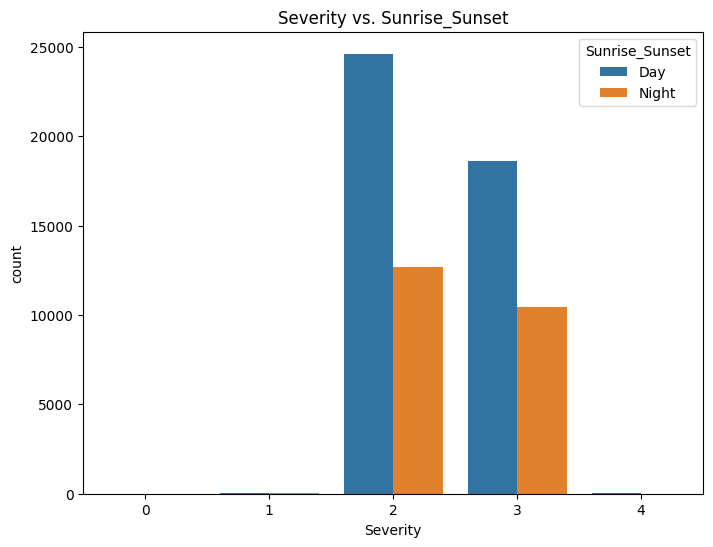

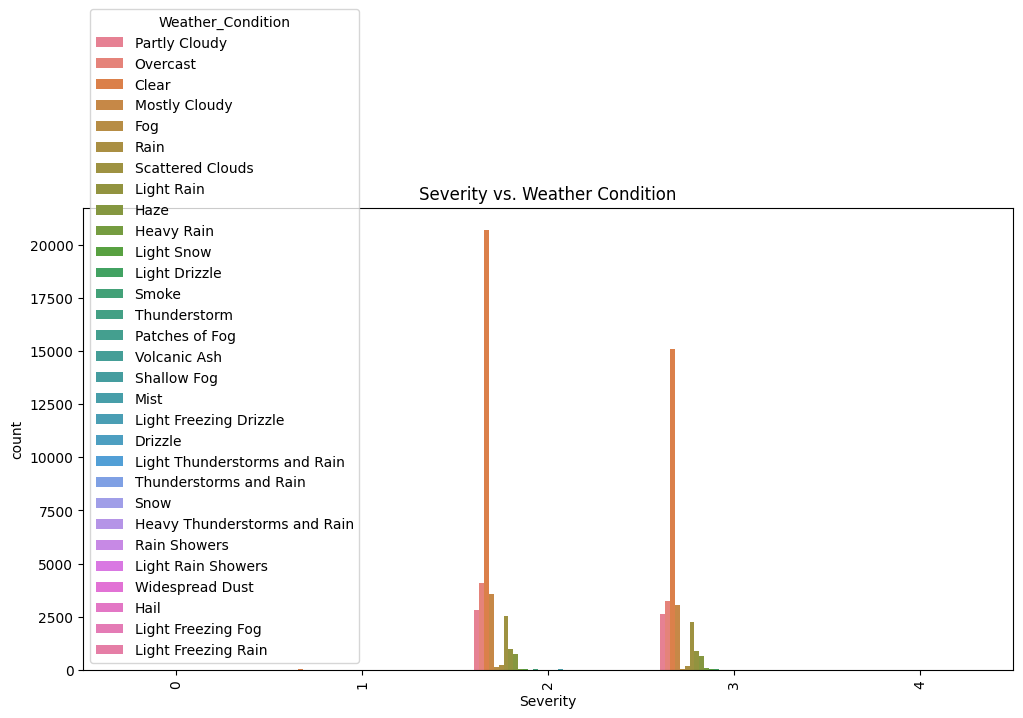

In [10]:


# Severity vs. Distance
plt.figure(figsize=(8, 6))
sns.boxplot(x='Severity', y='Distance(mi)', data=df_selected)
plt.title('Severity vs. Distance')
plt.show()

# Severity vs. Visibility
plt.figure(figsize=(8, 6))
sns.boxplot(x='Severity', y='Visibility(mi)', data=df_selected)
plt.title('Severity vs. Visibility')
plt.show()

# Severity vs. Weather Condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='Severity', y='Temperature(F)', data=df_selected)
plt.title('Severity vs. Temperature')
plt.show()

# Severity vs. Sunrise_Sunset
plt.figure(figsize=(8, 6))
sns.countplot(x='Severity', hue='Sunrise_Sunset', data=df_selected)
plt.title('Severity vs. Sunrise_Sunset')
plt.show()

# Severity vs. Weather Condition
plt.figure(figsize=(12, 6))
sns.countplot(x='Severity', hue='Weather_Condition', data=df_selected)
plt.title('Severity vs. Weather Condition')
plt.xticks(rotation=90)
plt.show()


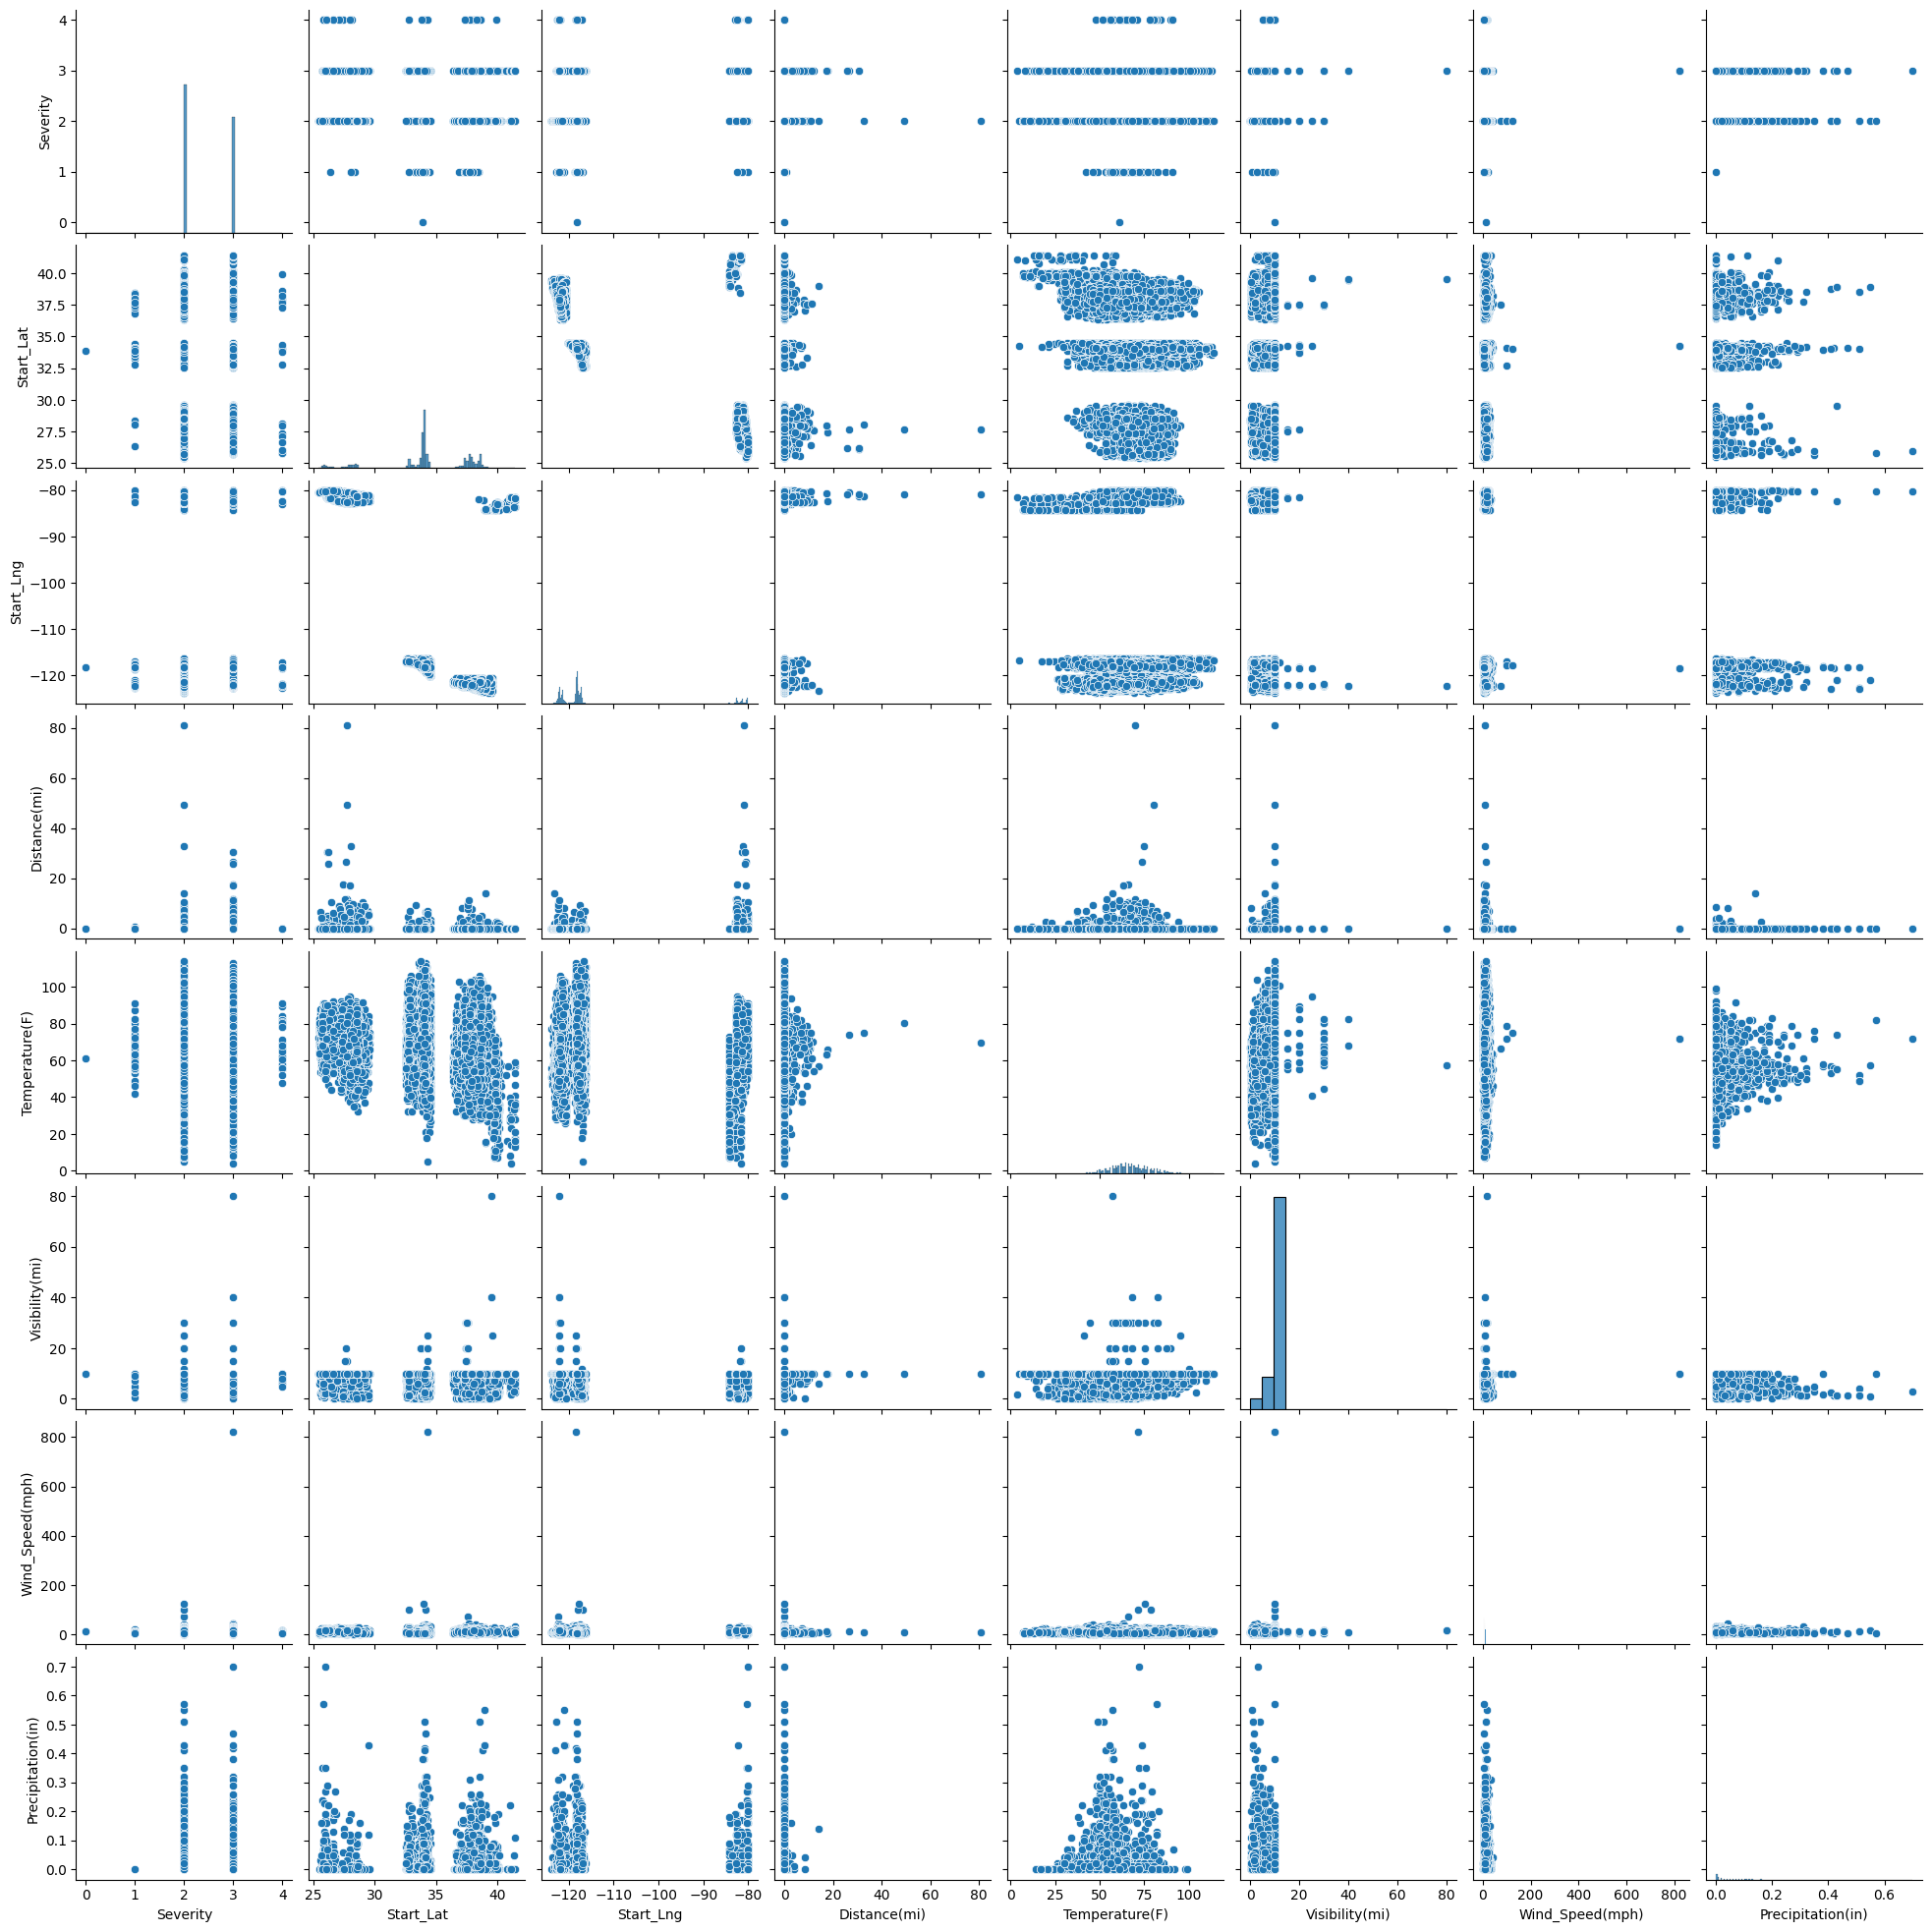

In [11]:
#sns.pairplot(df_selected)
plt.show()

**OUTLIER IN DATA**
Box plots reveal the presence of outliers in features like Distance(mi), Temperature(F), Visibility(mi), Wind_Speed(mph), and Precipitation(in). These outliers could result from extreme weather, unusual accidents, or data entry errors. Handling options include removing outliers carefully to avoid losing important data, applying transformations (like log transformation) to reduce their effect, or capping extreme values. It's essential to investigate whether these outliers represent real events or errors before deciding on the best approach.Normally it can be find out through box plot and distplot.








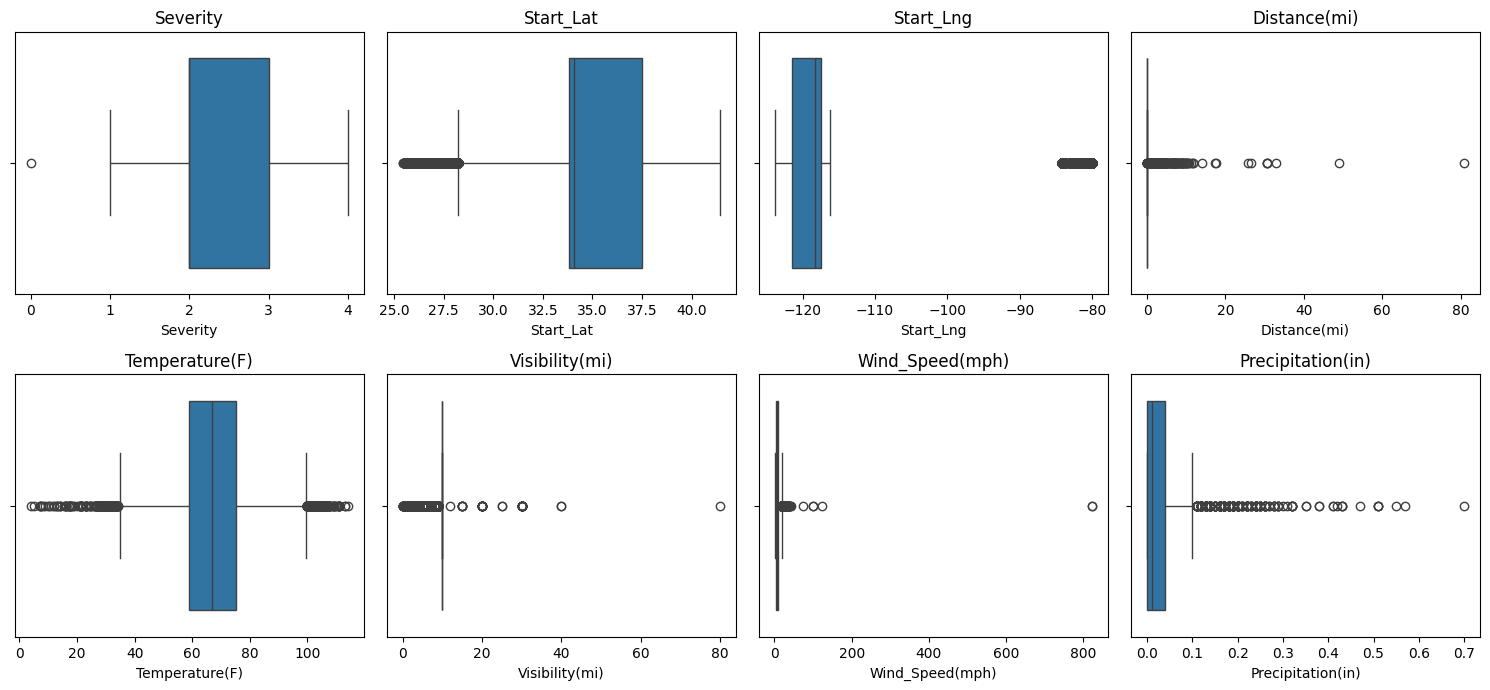

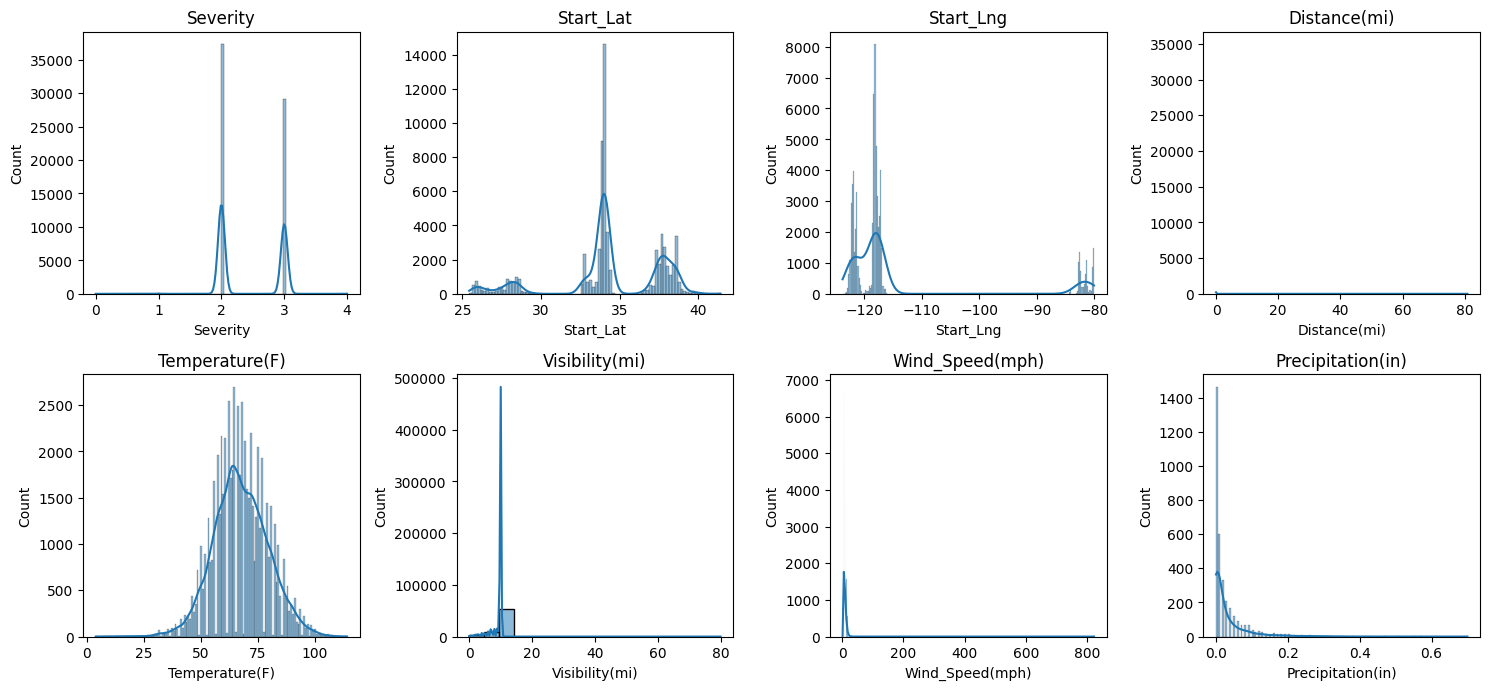

In [13]:

#plt.figure(figsize=(15, 10))
#for i, col in enumerate(df_selected.select_dtypes(include=np.number).columns):
  plt.subplot(3, 4, i+1)
  sns.boxplot(x=df_selected[col])
  plt.title(col)
plt.tight_layout()
plt.show()

# Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_selected.select_dtypes(include=np.number).columns):
  plt.subplot(3, 4, i+1)
  sns.histplot(df_selected[col], kde=True)
  plt.title(col)
plt.tight_layout()
plt.show()


**Remove Outliers:**
Outliers are identified and removed using the Interquartile Range (IQR) method. The IQR is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1). Any values below the lower bound (Q1 - 1.5 * IQR) or above the upper bound (Q3 + 1.5 * IQR) are considered outliers and are removed.

Benefits of Removing Outliers:

Improves Model Accuracy: Removing outliers can enhance the performance of models by reducing noise and making the data more representative of typical scenarios.
Prevents Skewed Results: Outliers can distort averages and correlations, leading to misleading conclusions. Removing them ensures more reliable statistical analysis.
Stabilizes Training: Models like linear regression and k-NN are sensitive to outliers, so eliminating them can prevent these models from being overly influenced by extreme values.
This process ensures a cleaner dataset, leading to more accurate and stable predictions.

In [14]:

# Calculate the IQR for numerical features
for col in df_selected.select_dtypes(include=np.number).columns:
  Q1 = df_selected[col].quantile(0.25)
  Q3 = df_selected[col].quantile(0.75)
  IQR = Q3 - Q1
  # Define bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  # Remove outliers
  df_selected = df_selected[~((df_selected[col] < lower_bound) | (df_selected[col] > upper_bound))]



In [15]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46786 entries, 38614 to 17657
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Severity               46786 non-null  int64  
 1   Start_Lat              46786 non-null  float64
 2   Start_Lng              46786 non-null  float64
 3   Distance(mi)           46786 non-null  float64
 4   Temperature(F)         44862 non-null  float64
 5   Visibility(mi)         44675 non-null  float64
 6   Wind_Speed(mph)        35515 non-null  float64
 7   Precipitation(in)      1008 non-null   float64
 8   Sunrise_Sunset         46785 non-null  object 
 9   Civil_Twilight         46785 non-null  object 
 10  Nautical_Twilight      46785 non-null  object 
 11  Astronomical_Twilight  46785 non-null  object 
 12  Weather_Condition      44804 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 5.0+ MB


In [17]:
df_selected.isnull().sum()

,0
Severity,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Temperature(F),1924
Visibility(mi),2111
Wind_Speed(mph),11271
Precipitation(in),45778
Sunrise_Sunset,1
Civil_Twilight,1


In [18]:
numerical_cols = df_selected.select_dtypes(include=np.number).columns
categorical_cols = df_selected.select_dtypes(include='object').columns

In [19]:
numerical_cols

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'],
      dtype='object')

In [20]:
categorical_cols

Index(['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Weather_Condition'],
      dtype='object')

**Imputation**
Numerical Columns: Missing values in numerical columns are filled with the mean of each column. This method is commonly used because it prevents the loss of data while maintaining the average value of the feature, ensuring that the overall distribution is not significantly altered.

Categorical Columns: Missing values in categorical columns are filled with the most frequent (mode) value of each column. Using the mode helps retain the most common category, ensuring the filled values are representative of the existing data.

This approach helps in preserving the dataset’s integrity by avoiding the loss of valuable data while ensuring consistency across both numerical and categorical features.

In [21]:
#fill numerical missing values by mean and catergorical by most frequent

# Fill missing values in numerical columns with the mean
df_selected[numerical_cols] = df_selected[numerical_cols].fillna(df_selected[numerical_cols].mean())

# Fill missing values in categorical columns with the most frequent value
for col in categorical_cols:
  df_selected[col] = df_selected[col].fillna(df_selected[col].mode()[0])


In [22]:
df_selected.isnull().sum()

,0
Severity,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Temperature(F),0
Visibility(mi),0
Wind_Speed(mph),0
Precipitation(in),0
Sunrise_Sunset,0
Civil_Twilight,0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [24]:
X=df_selected.drop(['Severity'],axis=1)
y=df_selected['Severity']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The dataset is being split into training and test sets using train_test_split. The independent variables (X) are the features selected for modeling, excluding the target variable Severity, while y is the target variable (Severity). The split allocates 80% of the data to training (X_train, y_train) and 20% to testing (X_test, y_test), ensuring that model performance can be evaluated on unseen data. The random_state=42 ensures reproducibility, meaning the split will be the same each time the code is run.

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [28]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46786 entries, 38614 to 17657
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Start_Lat              46786 non-null  float64
 1   Start_Lng              46786 non-null  float64
 2   Distance(mi)           46786 non-null  float64
 3   Temperature(F)         46786 non-null  float64
 4   Visibility(mi)         46786 non-null  float64
 5   Wind_Speed(mph)        46786 non-null  float64
 6   Precipitation(in)      46786 non-null  float64
 7   Sunrise_Sunset         46786 non-null  object 
 8   Civil_Twilight         46786 non-null  object 
 9   Nautical_Twilight      46786 non-null  object 
 10  Astronomical_Twilight  46786 non-null  object 
 11  Weather_Condition      46786 non-null  object 
dtypes: float64(7), object(5)
memory usage: 4.6+ MB


In [30]:
X.Civil_Twilight.unique()

array(['Day', 'Night'], dtype=object)

In [31]:
X.Sunrise_Sunset.unique()

array(['Day', 'Night'], dtype=object)

In [32]:
X.Astronomical_Twilight.unique()

array(['Day', 'Night'], dtype=object)

In [33]:
X.Nautical_Twilight.unique()

array(['Day', 'Night'], dtype=object)

In [34]:
X.Weather_Condition.unique()


array(['Clear', 'Partly Cloudy', 'Light Rain', 'Overcast',
       'Scattered Clouds', 'Mostly Cloudy', 'Light Drizzle', 'Smoke',
       'Patches of Fog', 'Haze', 'Rain', 'Volcanic Ash', 'Shallow Fog',
       'Heavy Rain', 'Widespread Dust', 'Drizzle', 'Light Rain Showers'],
      dtype=object)

In [35]:
numerical_cols

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'],
      dtype='object')

**Creation of Piplines:**
This code constructs a machine learning pipeline for predicting accident severity. It starts by defining a set of numerical features and categorical features related to twilight conditions and weather conditions. The ColumnTransformer is used to scale the numerical features using MinMaxScaler and to apply ordinal encoding to the categorical features such as Sunrise_Sunset, Civil_Twilight, and Weather_Condition.

Next, the pipeline uses SelectKBest with the chi-square (chi2) method to select the 10 most important features for prediction. Finally, LogisticRegression is applied as the model to predict accident severity. The pipeline combines all these steps to create a seamless process from preprocessing to model training. By using this approach, the code ensures that the entire transformation and model training is done in one integrated step.

In [39]:
from sklearn.feature_selection  import SelectKBest, chi2

In [78]:
from sklearn.preprocessing import MinMaxScaler
# Ensure correct feature names and category lists
numeric_features = ['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
twilight_columns = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
weather_column = ['Weather_Condition']

# Define weather categories correctly as a list of lists
weather_categories = [['Clear', 'Partly Cloudy', 'Scattered Clouds', 'Mostly Cloudy', 'Overcast',
                       'Light Drizzle', 'Drizzle', 'Light Rain', 'Rain', 'Heavy Rain',
                       'Light Rain Showers', 'Patches of Fog', 'Shallow Fog', 'Haze',
                       'Widespread Dust', 'Volcanic Ash', 'Smoke']]

# Define category list for twilight columns
twilight_categories = [['Day', 'Night']] * len(twilight_columns)

# Column transformer for scaling and ordinal encoding
tr01 = ColumnTransformer(
    transformers=[
        ("scaler", MinMaxScaler(), numeric_features),
        ("ordinal_twilight", OrdinalEncoder(categories=twilight_categories), twilight_columns),
        ("ordinal_weather", OrdinalEncoder(categories=weather_categories), weather_column)
    ],
    remainder="passthrough"  # Pass through the other columns unchanged
)

# SelectKBest for feature selection
tr02 = SelectKBest(chi2, k=10)

# Logistic regression model
tr03 = LogisticRegression()

# Create the pipeline with transformer and model
pipe = Pipeline([
    ("tr01", tr01),   # Column transformer
    ("tr02", tr02),   # SelectKBest
    ("tr03", tr03)    # Logistic regression
])

# Fit the pipeline
pipe.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tr01',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['Start_Lat', 'Start_Lng',
                                                   'Distance(mi)',
                                                   'Temperature(F)',
                                                   'Visibility(mi)',
                                                   'Wind_Speed(mph)',
                                                   'Precipitation(in)']),
                                                 ('ordinal_twilight',
                                                  OrdinalEncoder(categories=[['Day',
                                                                              'Night'],
                                                                             ['Day',
                                                                              'Night'],
                                                                             ['Day',
                                                                              'Night'],
                                                                             ['Day',
                                                                              'Night']]),
                                                  ['Sunrise_Sunset',...
                                                                              'Cloudy',
                                                                              'Scattered '
                                                                              'Clouds',
                                                                              'Mostly '
                                                                              'Cloudy',
                                                                              'Overcast',
                                                                              'Light '
                                                                              'Drizzle',
                                                                              'Drizzle',
                                                                              'Light '
                                                                              'Rain',
                                                                              'Rain',
                                                                              'Heavy '
                                                                              'Rain',
                                                                              'Light '
                                                                              'Rain '
                                                                              'Showers',
                                                                              'Patches '
                                                                              'of '
                                                                              'Fog',
                                                                              'Shallow '
                                                                              'Fog',
                                                                              'Haze',
                                                                              'Widespread '
                                                                              'Dust',
                                                                              'Volcanic '
                                                                              'Ash',
                                                                              'Smoke']]),
                                                  ['Weather_Condition'])])),
                ('tr02',
                 Selec

In [80]:
pipe.predict(X_test)

array([2, 2, 3, ..., 2, 2, 2])

In [81]:
accuracy_score(y_test,pipe.predict(X_test))

0.5548194058559521

**Evulation on Different Models**
The code evaluates the performance of four different classification models: K-Nearest Neighbors (KNN), Support Vector Classification (SVC), Decision Tree Classifier, and Random Forest Classifier. Each model is integrated into a pipeline with two main components:

Column Transformer (tr01): This step performs feature scaling and ordinal encoding.
Feature Selection (tr02): SelectKBest is used to select the top 10 features based on their importance.
Each model is then trained on the training data (X_train, y_train) and evaluated on the test data (X_test, y_test). The accuracy scores for each model are printed to compare their performance. This approach ensures that preprocessing, feature selection, and model training are consistently applied across different classifiers, allowing for a fair comparison of their accuracies.The code evaluates four classification models—K-Nearest Neighbors (KNN), Support Vector Classification (SVC), Decision Tree Classifier, and Random Forest Classifier—using a consistent pipeline for preprocessing and feature selection. The Decision Tree Classifier achieved the highest accuracy among the models tested. As a result, the Decision Tree model will be selected for further use due to its superior performance.

In [82]:

# KNeighborsClassifier
tr03_knn = KNeighborsClassifier()
pipe_knn = Pipeline([
    ("tr01", tr01),   # Column transformer
    ("tr02", tr02),   # SelectKBest
    ("tr03", tr03_knn)    # KNeighborsClassifier
])
pipe_knn.fit(X_train, y_train)
print("KNN Accuracy:", accuracy_score(y_test, pipe_knn.predict(X_test)))

# SVC
tr03_svc = SVC()
pipe_svc = Pipeline([
    ("tr01", tr01),   # Column transformer
    ("tr02", tr02),   # SelectKBest
    ("tr03", tr03_svc)    # SVC
])
pipe_svc.fit(X_train, y_train)
print("SVC Accuracy:", accuracy_score(y_test, pipe_svc.predict(X_test)))

# DecisionTreeClassifier
tr03_dt = DecisionTreeClassifier()
pipe_dt = Pipeline([
    ("tr01", tr01),   # Column transformer
    ("tr02", tr02),   # SelectKBest
    ("tr03", tr03_dt)    # DecisionTreeClassifier
])
pipe_dt.fit(X_train, y_train)
print("Decision Tree Accuracy:", accuracy_score(y_test, pipe_dt.predict(X_test)))

# RandomForestClassifier
tr03_rf = RandomForestClassifier()
pipe_rf = Pipeline([
    ("tr01", tr01),   # Column transformer
    ("tr02", tr02),   # SelectKBest
    ("tr03", tr03_rf)    # RandomForestClassifier
])
pipe_rf.fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, pipe_rf.predict(X_test)))


KNN Accuracy: 0.6018379995725582
SVC Accuracy: 0.5626202179952982
Decision Tree Accuracy: 0.8897200256465057
Random Forest Accuracy: 0.8375721307971788


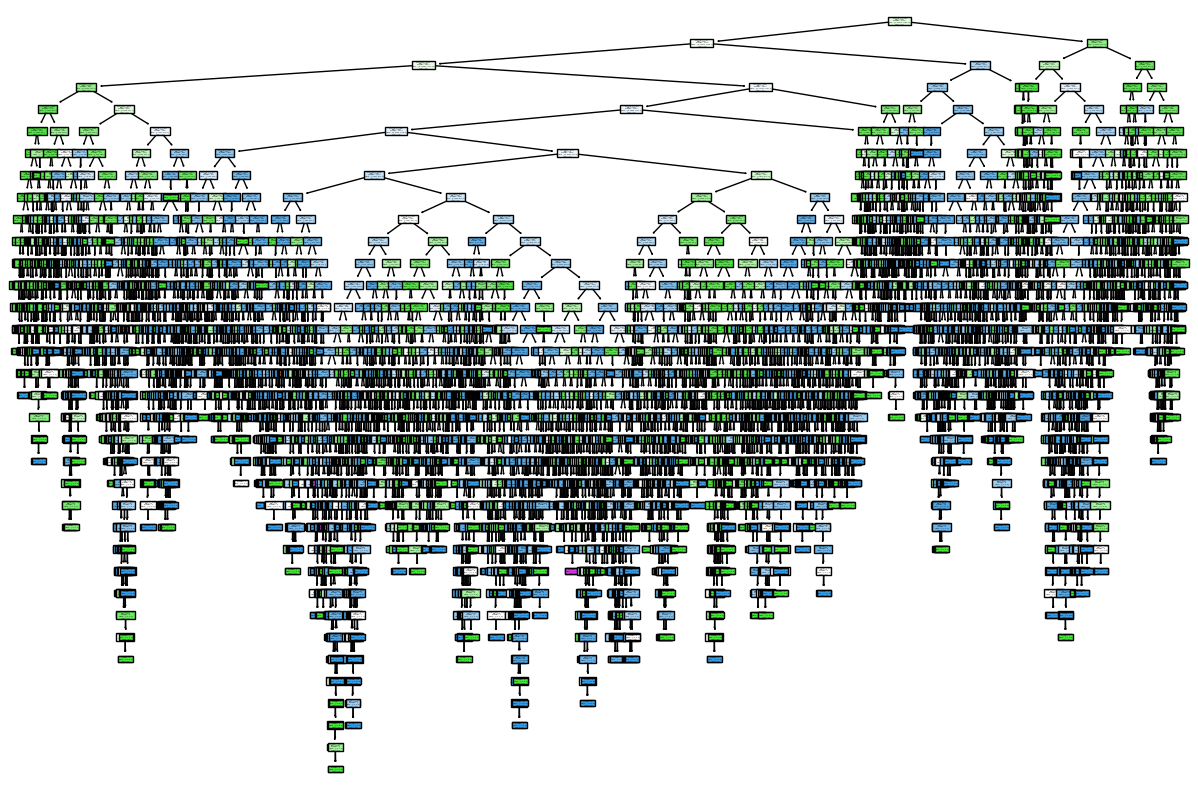

In [87]:


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'pipe_dt' is your trained pipeline with DecisionTreeClassifier
plt.figure(figsize=(15, 10))
plot_tree(pipe_dt['tr03'], feature_names=X.columns, class_names=True, filled=True)
plt.show()


**Tunning the Hypermenters in Decsion Tree**
The code performs a grid search to optimize the hyperparameters of the Decision Tree Classifier. Initially, the Decision Tree model achieved an accuracy of 88% on the test set. After tuning the hyperparameters using GridSearchCV, which explored different values for criterion, max_depth, min_samples_split, and min_samples_leaf, the accuracy improved to 89%. This demonstrates that hyperparameter tuning can enhance model performance and achieve better results on unseen data.








In [83]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
param_grid = {
    'tr03__criterion': ['gini', 'entropy'],
    'tr03__max_depth': [None, 5, 10, 15],
    'tr03__min_samples_split': [2, 5, 10],
    'tr03__min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe_dt, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))


Best parameters: {'tr03__criterion': 'entropy', 'tr03__max_depth': None, 'tr03__min_samples_leaf': 2, 'tr03__min_samples_split': 10}
Best score: 0.8940632998118421
Test accuracy: 0.8953836289805513


In [86]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Before Grid Search
y_pred_dt = pipe_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# After Grid Search
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Create a DataFrame for comparison
data = {
    'Model': ['Decision Tree (Before Grid Search)', 'Decision Tree (After Grid Search)'],
    'Accuracy': [accuracy_dt, accuracy_best],
    'Precision': [precision_dt, precision_best],
    'Recall': [recall_dt, recall_best],
    'Confusion Matrix': [conf_matrix_dt, conf_matrix_best]
}
results_df = pd.DataFrame(data)

print(results_df)


                                Model  Accuracy  Precision    Recall  \
0  Decision Tree (Before Grid Search)  0.889720   0.890284  0.889720   
1   Decision Tree (After Grid Search)  0.895384   0.894577  0.895384   

                                    Confusion Matrix  
0  [[0, 7, 4, 0], [6, 4545, 501, 2], [5, 503, 378...  
1        [[0, 8, 3], [3, 4590, 461], [0, 504, 3789]]  


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
